## Install packages

In [288]:
# !pip install MiniSom

## Import the Libraries

In [120]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
from sklearn.datasets import load_breast_cancer
import random
random.seed(10)


In [21]:
## Input Player Stats 
dataset = pd.read_csv('Player_Stats.csv')

In [22]:
dataset.head()

,Player,matches,balls_faced,innings,runs,4s,6s,bat_average,bat_strike,balls_bowled,wickets,overs,runs_conceded,bowl_econ,catches
0,A Ashish Reddy,28,196,23,280,16,15,12.17,142.86,270,18,45,386,8.58,9
1,A Chandila,12,7,2,4,0,0,2.00,57.14,234,11,39,242,6.21,7
2,A Chopra,6,75,6,53,7,0,8.83,70.67,0,0,0,0,0.00,2
3,A Choudhary,5,20,3,25,1,1,8.33,125.00,108,5,17,137,8.06,0
4,A Dananjaya,1,5,1,4,0,0,4.00,80.00,25,0,4,46,11.50,0


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         648 non-null    object 
 1   matches        648 non-null    int64  
 2   balls_faced    648 non-null    int64  
 3   innings        648 non-null    int64  
 4   runs           648 non-null    int64  
 5   4s             648 non-null    int64  
 6   6s             648 non-null    int64  
 7   bat_average    648 non-null    float64
 8   bat_strike     648 non-null    float64
 9   balls_bowled   648 non-null    int64  
 10  wickets        648 non-null    int64  
 11  overs          648 non-null    int64  
 12  runs_conceded  648 non-null    int64  
 13  bowl_econ      648 non-null    float64
 14  catches        648 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 76.1+ KB


## Clean and Label Encode Data 

In [26]:
train = dataset.loc[:,'matches':].copy()

In [28]:
for c in train.columns:
    train[c] = train[c].apply(pd.to_numeric, errors='coerce')
    median = np.median(train.loc[train[c].notnull(),c])
    train[c] = train[c].fillna(median)

## Scale Data

In [29]:
train.head()

,matches,balls_faced,innings,runs,4s,6s,bat_average,bat_strike,balls_bowled,wickets,overs,runs_conceded,bowl_econ,catches
0,28,196,23,280,16,15,12.17,142.86,270,18,45,386,8.58,9
1,12,7,2,4,0,0,2.00,57.14,234,11,39,242,6.21,7
2,6,75,6,53,7,0,8.83,70.67,0,0,0,0,0.00,2
3,5,20,3,25,1,1,8.33,125.00,108,5,17,137,8.06,0
4,1,5,1,4,0,0,4.00,80.00,25,0,4,46,11.50,0


In [30]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(train.values)

## SOM initialization

In [44]:
from minisom import MiniSom
# Set Matrix Size of SOM Mapping
size = 8
# Set hypperparameters for SOM algorithm
som = MiniSom(x=size, y=size, input_len= X.shape[1], sigma= 1.0, learning_rate = 0.25)
# Initialize random weights of the neurons
som.random_weights_init(X)
# Train neurons on data with 100 iterations or epochs
som.train_random(data = X, num_iteration = 100)

## Plot Average Mean Inter-Neuron Distance(MID): The lighter the shade it implies, that neuron is farther from its neighboring neurons. And hence those players can be considered to have outlier-ish capabilities which are not similar to other nodes.

In [143]:
bone()

<Figure size 432x288 with 0 Axes>

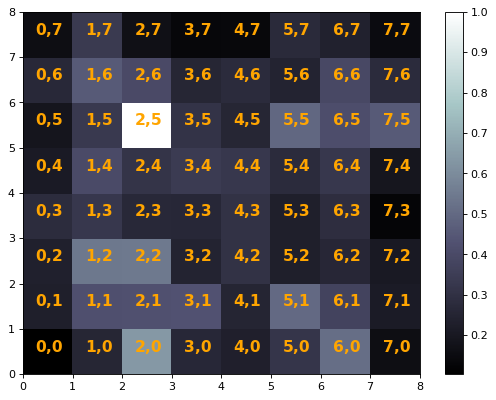

In [147]:
from pylab import bone, pcolor, colorbar, plot, show
figure(figsize=(8, 6), dpi=80)
bone()
pcolor(som.distance_map().T)
colorbar()
for i in range(size):
    for j in range(size):
        plt.text(
            i+0.25,j+0.5,f'{i},{j}',
            fontsize = 14,
            color = 'orange',
            fontweight = 'demi'
                )

## All players have been mapped to a coordinate in this matrix. The players in node or neuron (3,1) are outliers! Who are these players?

In [46]:
som_coord = []
for i,x in enumerate(X):
    som_coord.append(som.winner(x))

In [47]:
dataset['som_coord'] = som_coord

In [149]:
dataset.loc[dataset['som_coord']==(2,5)].head(10)

,Player,matches,balls_faced,innings,runs,4s,6s,bat_average,bat_strike,balls_bowled,wickets,overs,runs_conceded,bowl_econ,catches,som_coord
7,A Mishra,150,410,54,362,29,5,6.70,88.29,3233,160,529,3788,7.16,21,"(2, 5)"
84,B Kumar,121,199,42,183,17,3,4.36,91.96,2795,136,454,3132,6.90,27,"(2, 5)"
177,DW Steyn,95,163,33,167,14,3,5.06,102.45,2276,97,364,2391,6.57,24,"(2, 5)"
209,Harbhajan Singh,160,632,86,829,79,42,9.64,131.17,3451,150,563,3868,6.87,48,"(2, 5)"
242,JJ Bumrah,92,42,11,40,2,1,3.64,95.24,2159,109,350,2513,7.18,9,"(2, 5)"
406,P Kumar,119,323,57,340,22,17,5.96,105.26,2637,90,424,3106,7.33,14,"(2, 5)"
425,PP Chawla,164,541,75,584,54,18,7.79,107.95,3285,156,546,4196,7.68,40,"(2, 5)"
434,R Ashwin,151,384,55,412,35,11,7.49,107.29,3327,138,540,3581,6.63,34,"(2, 5)"
451,R Vinay Kumar,104,289,42,310,21,9,7.38,107.27,2179,105,357,2906,8.14,35,"(2, 5)"
533,SL Malinga,122,103,20,88,6,5,4.40,85.44,2974,170,478,3193,6.68,21,"(2, 5)"


In [109]:
weights_df = pd.DataFrame()
for i in range(0,8):
    temp_df = pd.DataFrame(sc.inverse_transform(som._weights[i]),columns = train.columns)
    temp_df['som_coord'] = [(i,j) for j in np.arange(8)]
    weights_df= weights_df.append(temp_df,ignore_index=True)

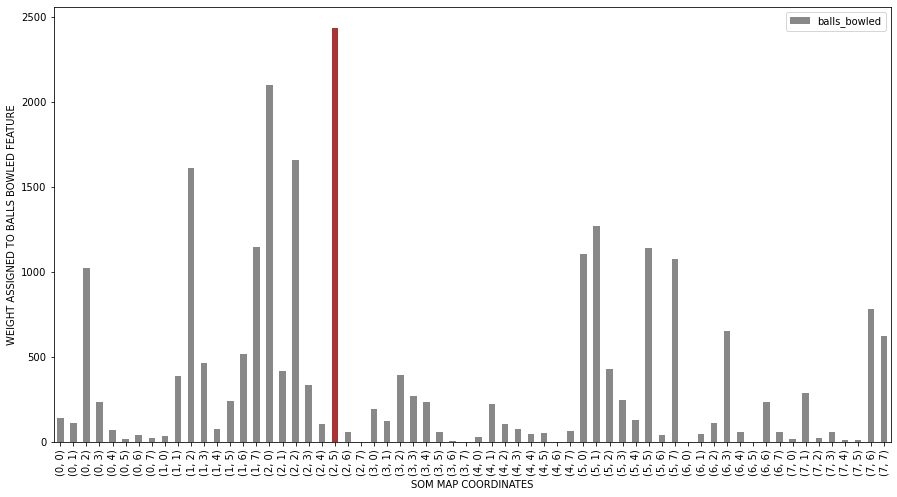

In [153]:
ax =  weights_df[['balls_bowled','som_coord']].plot.bar(x='som_coord',figsize=(15,8),legend=False)
for bar in ax.patches:
    bar.set_facecolor('#888888')
ax.patches[21].set_facecolor('#aa3333')
ax.set_xlabel('SOM MAP COORDINATES')
ax.set_ylabel('WEIGHT ASSIGNED TO BALLS BOWLED FEATURE')
ax.legend()

##  We can see these are stellar bowlers with highest number of balls bowled in comparison to the full dataset